# Assignment 2 - Machine Learning

We chose this and did that bla bla bla...
<br>

## Part 1 - Data Preparation

In [243]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [244]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1666744272&period2=1698280272&interval=1d&events=history&includeAdjustedClose=true')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
1,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
2,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
3,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
4,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
...,...,...,...,...,...,...,...
246,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700
247,2023-10-20,217.009995,218.860001,210.419998,211.990005,211.990005,137734000
248,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400
249,2023-10-24,216.500000,222.050003,214.110001,216.520004,216.520004,118231100


In [245]:
df = df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Adj Close  251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [246]:
df = df.rename(columns={'Adj Close': 'Adj_Close'})

In [247]:
# Turn date into values that can be used by the model
from datetime import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.toordinal) # day as integer since 1.1.1
df.sort_values(by=['Date'], inplace=True)

In [248]:
# scaling the dates

min_date = df['Date'].min()
df['Date'] = df['Date'] - min_date

df

,Date,Adj_Close
0,0,224.639999
1,1,225.089996
2,2,228.520004
3,5,227.539993
4,6,227.820007
...,...,...
246,358,220.110001
247,359,211.990005
248,362,212.080002
249,363,216.520004


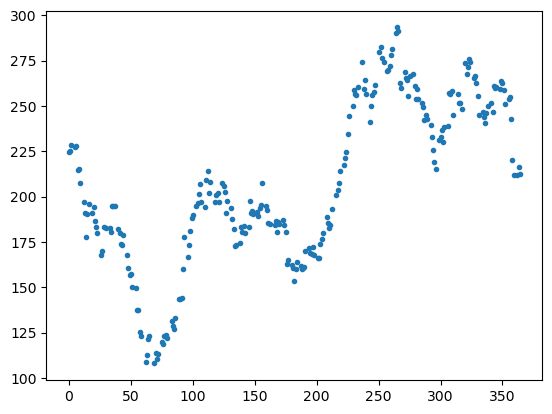

In [249]:
plt.scatter(df.Date, df.Adj_Close, marker='.')

## Part 2 - Split - Training and testing

In [250]:
# Split data into training and testing
X = df.Date.values.reshape(-1, 1)
y = df.Adj_Close.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

## Part 3 - Polynomial Regression

In [251]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [252]:
# Transform input data
poly = PolynomialFeatures(degree=7)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [253]:
# Create model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [254]:
# Predict
y_pred = model.predict(X_test_poly)

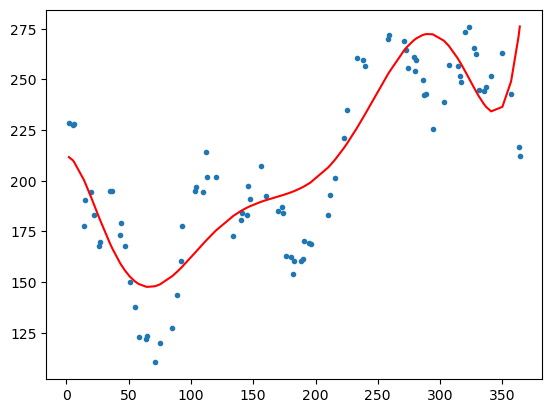

In [255]:
# Plot
sorted_indices = X_test.ravel().argsort()
X_test_sorted = X_test[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(X_test, y_test, marker='.')
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.show()
